## Gaussian Mixture Model - GMM

In [1]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style='whitegrid')

### 1.  Generate some data samples from a 1D GMM with two Gaussian Components

In [2]:
data=np.zeros((1000,))
for n in range(0, 1000):
    #randomly select a Gaussian component (c0, c1) with prob of 0.5
    r= int(np.random.rand() > 0.5)  # rand ~ uniform random distribution
    if r == 0:
       # randomly draw a sample from the Gaussian component (mean = 2, std=1)
       sample =  2 + np.random.randn() 
    else:
       # randomly draw a sample from the Gaussian component (mean = 6, std=1)
       sample =  6 + np.random.randn() 
    data[n]=sample

In [3]:
data

array([ 7.11387399,  7.00686696,  2.76006349,  2.34561441,  0.97441922,
        2.13493627,  1.56135896,  4.93896244,  2.55415309,  2.58585748,
        2.60845879,  1.01234849,  3.7955288 ,  6.91213125,  0.81100862,
        3.64582605,  0.95916984,  2.5033767 ,  5.56010044,  0.88437932,
        6.30100792,  7.11948198,  6.79345508,  5.54445896,  2.4082747 ,
        4.70454118,  2.02089668,  5.29420355,  4.56508957,  7.71800227,
        6.34236284,  1.66728281,  5.21778995,  1.8035757 , -0.2736324 ,
        2.60817277,  5.63282995,  5.12244552,  1.25587766,  5.2514476 ,
        2.41284768,  3.28629361,  6.41809297,  2.4566871 ,  0.78643635,
        2.05656536,  4.52009256,  4.31906919,  5.13933395,  6.23300449,
        6.85200092,  0.64904893,  5.70881747,  6.92824774,  2.25406875,
        4.50626633,  1.12737627,  6.72993318,  1.88327921,  5.66672946,
        6.20593049,  3.9562823 ,  2.16044566,  2.1444674 ,  5.11261701,
        1.68291948,  1.83202896,  5.97547091,  4.61725209,  5.41

visualize the 1D data by using 1D histogram 

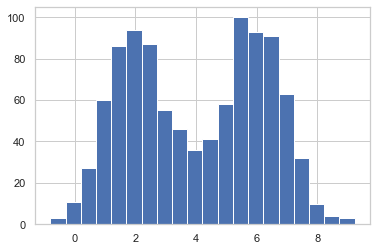

In [4]:
fig, ax = plt.subplots()
ax.hist(data, bins=20);

### 2. Estimate the Parameters of the 1D GMM from  the Data Samples

### Let's pretend that we do not know how the `data` is generated. 
### We 'guess' that the data samples are from a 1D GMM with two Gaussian components.
### Use Maximum Likelihood (ML) method to estimate the parameters of the 1D GMM

In [5]:
from sklearn.mixture import GaussianMixture
GMM=GaussianMixture(2)
#GMM.fit(data) # fit the GMM model to data -> estimate the parameters 
GMM.fit(data.reshape(-1,1)) 

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [6]:
GMM.weights_ # prior probability of each cluster

array([0.510385, 0.489615])

In [7]:
GMM.means_

array([[5.9373269 ],
       [2.04367687]])

In [8]:
GMM.covariances_

array([[[0.99379627]],

       [[0.99472768]]])

In [9]:
score=GMM.score_samples(np.linspace(0, 10, 1000).reshape(1000,1))
pdf = np.exp(score) # pdf of the GMM

Text(0.5, 1.0, 'GMM pdf')

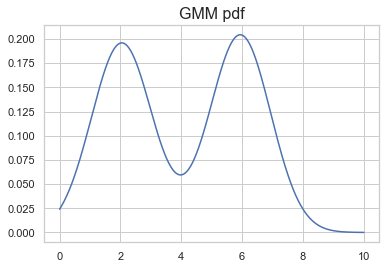

In [10]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0, 10, 1000), pdf)
ax.set_title('GMM pdf', fontsize=16)

Then, we do clustering: divide the data into two clusters corresponding to the two Gaussian components 

In [11]:
cluster_label=GMM.predict(data.reshape(-1,1))
cluster_label

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,

Text(0.5, 1.0, 'clustering result')

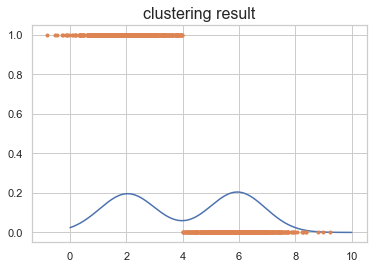

In [12]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0, 10, 1000), pdf)
ax.plot(data, cluster_label, '.')
ax.set_title('clustering result', fontsize=16)

Text(0.5, 1.0, 'clustering result on new_data')

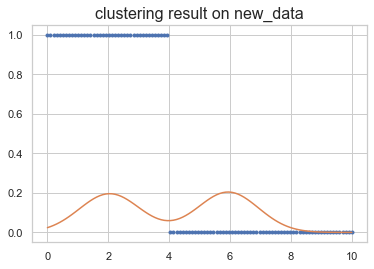

In [13]:
new_data = np.linspace(0, 10, 100).reshape(100,1)
new_label = GMM.predict(new_data)
new_score = GMM.score_samples(new_data)
pdf_value = np.exp(new_score) # pdf of the GMM

fig, ax = plt.subplots()
ax.plot(new_data, new_label, '.')
ax.plot(new_data, pdf_value)
ax.set_title('clustering result on new_data', fontsize=16)

In [14]:
new_data

array([[ 0.        ],
       [ 0.1010101 ],
       [ 0.2020202 ],
       [ 0.3030303 ],
       [ 0.4040404 ],
       [ 0.50505051],
       [ 0.60606061],
       [ 0.70707071],
       [ 0.80808081],
       [ 0.90909091],
       [ 1.01010101],
       [ 1.11111111],
       [ 1.21212121],
       [ 1.31313131],
       [ 1.41414141],
       [ 1.51515152],
       [ 1.61616162],
       [ 1.71717172],
       [ 1.81818182],
       [ 1.91919192],
       [ 2.02020202],
       [ 2.12121212],
       [ 2.22222222],
       [ 2.32323232],
       [ 2.42424242],
       [ 2.52525253],
       [ 2.62626263],
       [ 2.72727273],
       [ 2.82828283],
       [ 2.92929293],
       [ 3.03030303],
       [ 3.13131313],
       [ 3.23232323],
       [ 3.33333333],
       [ 3.43434343],
       [ 3.53535354],
       [ 3.63636364],
       [ 3.73737374],
       [ 3.83838384],
       [ 3.93939394],
       [ 4.04040404],
       [ 4.14141414],
       [ 4.24242424],
       [ 4.34343434],
       [ 4.44444444],
       [ 4

Calculate posterior probability of data under each Gaussian in the model.

Text(0.5, 1.0, 'posterior probability')

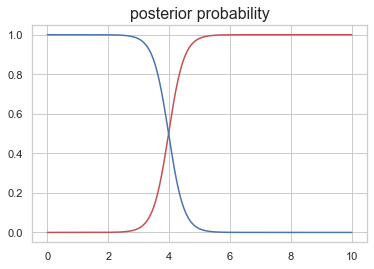

In [15]:
prob=GMM.predict_proba(np.linspace(0, 10, 1000).reshape(1000,1))
fig, ax = plt.subplots()
ax.plot(np.linspace(0, 10, 1000), prob[:,0], 'r')
ax.plot(np.linspace(0, 10, 1000), prob[:,1], 'b')
ax.set_title('posterior probability', fontsize=16)